# 几何变换

- 导入相关库

In [33]:
import numpy as np
import cv2 as cv
import zhplot
import matplotlib.pyplot as plt

zhplot.matplotlib_chineseize()

- 展示原图

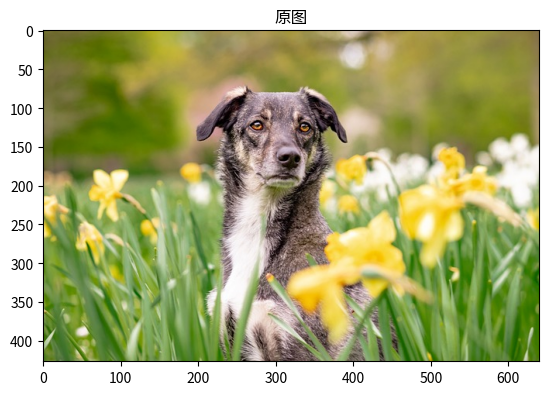

In [34]:
image = cv.imread('./images/image.jpg', cv.IMREAD_COLOR)
plt.title('原图')
plt.imshow(image[:, :, ::-1])

## 图像缩放

原始图像：height=427, width=640
使用绝对尺寸，宽高各缩小 1 倍：height=213, width=320


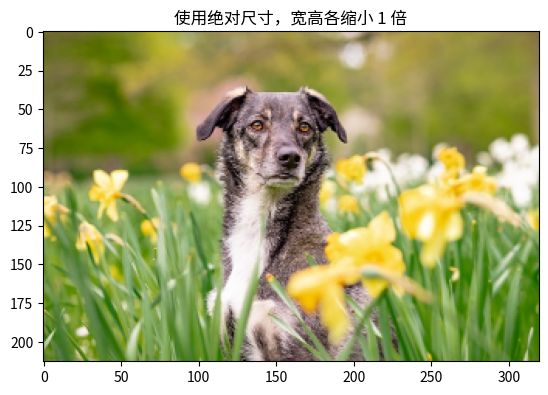

In [35]:
height, width = image.shape[:2]
print("原始图像：height=" + str(height) + ", width=" + str(width))
height = height >> 1
width = width >> 1
print("使用绝对尺寸，宽高各缩小 1 倍：height=" + str(height) + ", width=" + str(width))
res = cv.resize(image, (width, height)) # 使用绝对尺寸，宽高各缩小 1 倍
plt.title('使用绝对尺寸，宽高各缩小 1 倍')
plt.imshow(res[:, :, ::-1])

原始图像：height=427, width=640
使用绝对尺寸，宽高各缩小 1 倍


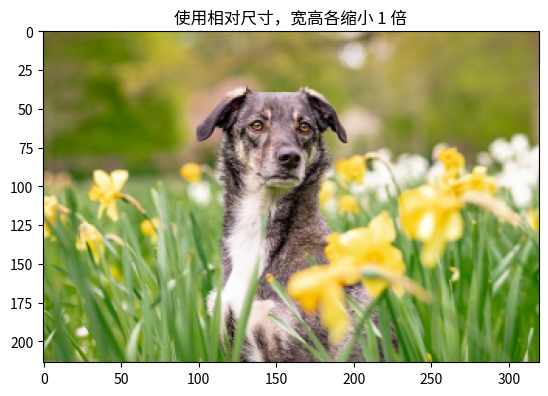

In [36]:
height, width = image.shape[:2]
print("原始图像：height=" + str(height) + ", width=" + str(width))
print("使用绝对尺寸，宽高各缩小 1 倍")
res = cv.resize(image, None, fx=0.5, fy=0.5) # 使用相对尺寸，宽高各缩小 1 倍
plt.title('使用相对尺寸，宽高各缩小 1 倍')
plt.imshow(res[:, :, ::-1])

## 图像平移

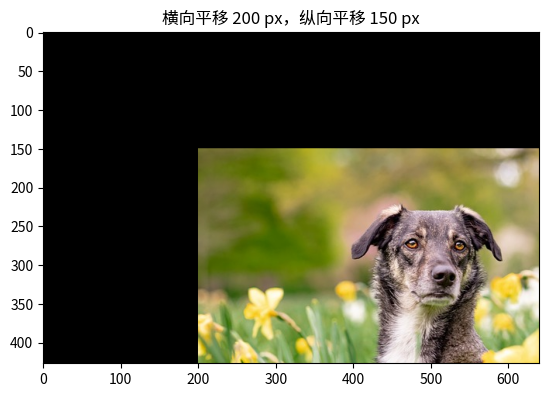

In [37]:
M = np.float32([[1, 0, 200], [0, 1, 150]])
res = cv.warpAffine(image, M, (width, height)) # 横向平移 200 px，纵向平移 300 px
plt.title('横向平移 200 px，纵向平移 150 px')
plt.imshow(res[:, :, ::-1])

## 图像旋转

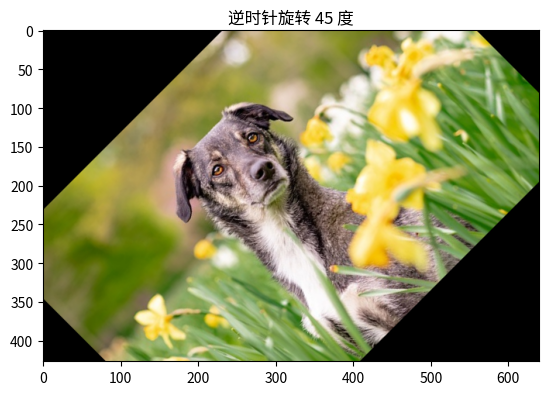

In [38]:
M = cv.getRotationMatrix2D((width >> 1, height >> 1), 45, 1)
res = cv.warpAffine(image, M, (width, height)) # 逆时针旋转 45 度
plt.title('逆时针旋转 45 度')
plt.imshow(res[:, :, ::-1])

## 仿射变换

M = [[ 2.33333333e+00 -2.33333333e-01 -1.33333333e+01]
 [-1.77635684e-16  1.00000000e+00  5.00000000e+01]]


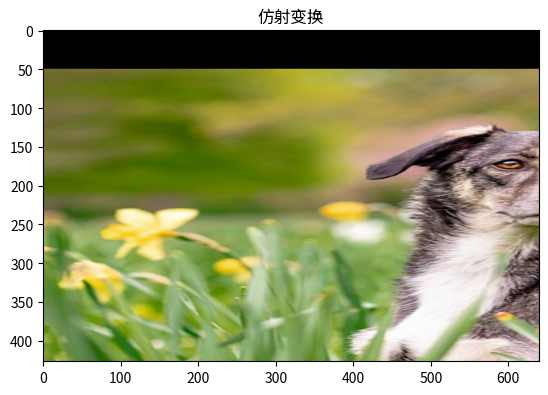

In [39]:
pts1 = np.float32([[50, 100], [100, 300], [120, 500]])
pts2 = np.float32([[80, 150], [150, 350], [150, 550]])
M = cv.getAffineTransform(pts1, pts2)
print("M =", M)
res = cv.warpAffine(image, M, (width, height))
plt.title('仿射变换')
plt.imshow(res[:, :, ::-1])

## 投射变换

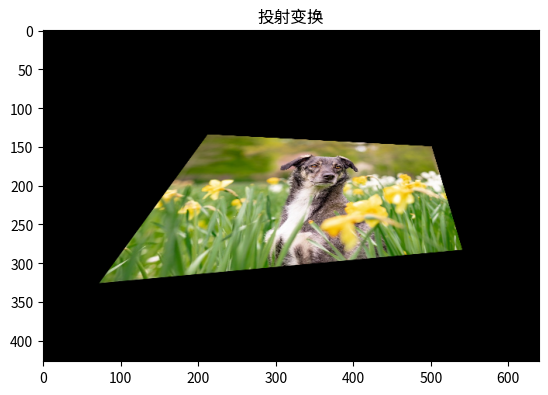

In [40]:
pts1 = np.float32([[200, 200], [600, 200], [200, 800], [600, 1000]])
pts2 = np.float32([[300, 200], [500, 200], [100, 800], [700, 1000]])
T = cv.getPerspectiveTransform(pts1, pts2)
res = cv.warpPerspective(image, T, (width, height))
plt.title('投射变换')
plt.imshow(res[:, :, ::-1])

## 图像金字塔

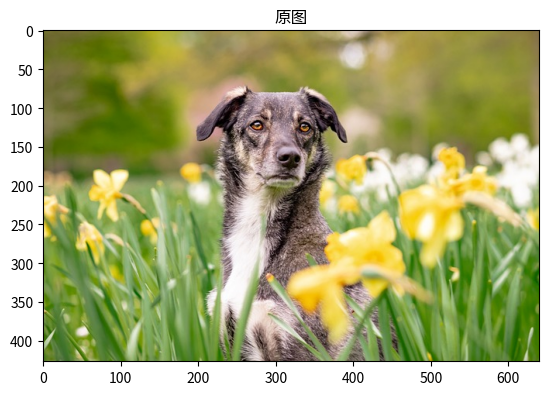

In [41]:
plt.title('原图')
plt.imshow(image[:, :, ::-1])

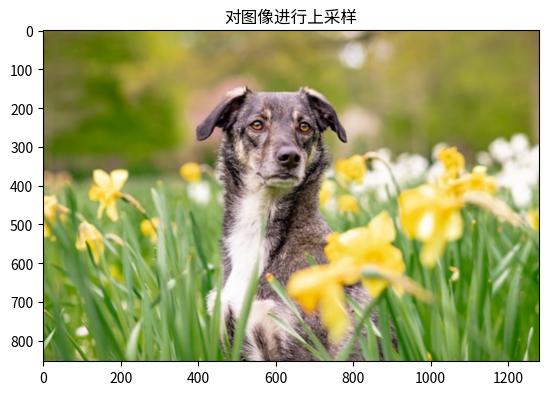

In [42]:
res = cv.pyrUp(image) # 对图像进行上采样
plt.title('对图像进行上采样')
plt.imshow(res[:, :, ::-1])

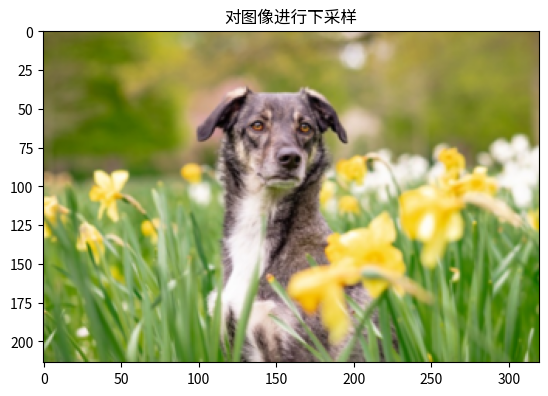

In [43]:
res = cv.pyrDown(image) # 对图像进行下采样
plt.title('对图像进行下采样')
plt.imshow(res[:, :, ::-1])